In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df = pd.read_csv('지역화폐 가맹점_20240331.csv',  encoding='cp949')

In [140]:
df.head()

,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,사업자등록번호,업종코드,가맹점번호,휴폐업상태,휴폐업상태코드,폐업일자,데이터기준일자
0,고양시,까망노래연습장,노래방,경기도 고양시 일산동구 탄중로 322,"경기도 고양시 일산동구 중산동 1570-3번지 고봉프라자 201,202호",10333.0,37.693154,126.780749,102-30-07121,8402,979093887,NaN,NaN,NaN,20240331
1,고양시,일산좋은치과의원,치과,경기도 고양시 일산동구 일산로 441,경기도 고양시 일산동구 정발산동 1204번지 일성조합상가 3층 301호,10359.0,37.673089,126.777688,160-97-00108,4201,979091022,NaN,NaN,NaN,20240331
2,고양시,잉크존,"문구,사무용품",경기도 고양시 일산서구 중앙로 1388,경기도 고양시 일산서구 주엽동 73번지 강선마을11단지아파트 지하1층 28호,10366.0,37.668358,126.766100,660-03-00201,8102,979075504,NaN,NaN,NaN,20240331
3,고양시,참좋은집,오양.보육.복지시설,경기도 고양시 일산동구 고봉로770번길 211-1,경기도 고양시 일산동구 성석동 1061-40번지,10252.0,37.717316,126.796933,815-80-00122,7301,976706432,NaN,NaN,NaN,20240331
4,고양시,(주)팩토리빈,커피전문점,경기도 고양시 일산동구 멱절길 368-104,경기도 고양시 일산동구 장항동 671-9번지 1층,10397.0,37.650748,126.760605,463-81-00044,2502,976704676,NaN,NaN,NaN,20240331


In [141]:
# 시군명, 업종명(종목명), 업종코드, 휴폐업상태, 휴페업상태 코드, 폐업일자 남기고 다른 column 삭제
# 시군명 -> 각 시마다 어떤 업종이 아직 폐업, 휴업중이 아닌지, 분석 할 수 있음1
# 업종명, 업종 코드 -> 업종 종류를 분류 할 수 있음
# 휴폐업상태 -> 어떤 업종이 휴폐업 상태인지 분류 가능. 그리고 비슷한 업종끼리 묶어서 분류 가능
# 휴폐업 상태 코드는 뭔지 잘 모름. 찾아보니 계속 사업자 1, 휴업자 2, 폐업자 3 그렇다면 휴폐업 상태를 버려도? 코드만 보고 분석 가능. , 정상영업하는 곳은 0으로 처리
# 폐업 일자 -> 폐업일자를 월 별로 묶어 어떤 달에 어떤 업종이 가장 많이 폐업을 했는지 분석 가능
# - 아직 분석을 안해봐서 모르지만 폐업한 업종을 분류해서 어떤 업종은 지역화폐를 사용해도 폐업할 가능성이 높다는 결론을 도출해낼 수도 있음
# - 휴폐업상태를 알 수 있다는게 유의미한 결과가 될 수도??
#  현재 시군별로 있는 지역화폐 가맹점을 위의 연령과 성별, 신규가입자수 등과 비교하면서 어떤 시군에 어떤 지역화폐 가맹점을 늘리면 경제에 유의미한 변화가 생길지 등을 분석할 수 있음
# 업종명이 많은 순서대로 나열해서, 시/군 명과 업종명의 연관성을 분석
# 22년데이터에서 새로 추가된 4천개의 데이터만 뽑아 최근 2년간 어떤 업종이 유행했는지도 분석 가능

In [142]:
# column 삭제
df_filtered = df[['시군명', '업종명(종목명)', '상호명', '업종코드', '휴폐업상태코드', '폐업일자']].copy()

df_filtered.head()

,시군명,업종명(종목명),상호명,업종코드,휴폐업상태코드,폐업일자
0,고양시,노래방,까망노래연습장,8402,NaN,NaN
1,고양시,치과,일산좋은치과의원,4201,NaN,NaN
2,고양시,"문구,사무용품",잉크존,8102,NaN,NaN
3,고양시,오양.보육.복지시설,참좋은집,7301,NaN,NaN
4,고양시,커피전문점,(주)팩토리빈,2502,NaN,NaN


In [143]:
# nan값 전부 1로 채우기
df_filtered['휴폐업상태코드'] = df_filtered['휴폐업상태코드'].fillna(1)

In [144]:
df_filtered['휴폐업상태코드'] = df_filtered['휴폐업상태코드'].astype(int)

In [145]:
unique_city_county_names_list = df_filtered['시군명'].unique().tolist()

In [146]:
for city_county_name in unique_city_county_names_list:
    # Filter DataFrame for the current city/county
    filtered_df = df_filtered[df_filtered['시군명'] == city_county_name]
    
    # Group by '휴폐업상태코드' and count occurrences
    grouped_result = filtered_df.groupby('휴폐업상태코드').size()
    
    # Print city/county name and the grouped result
    print(f"\nCity/County: {city_county_name}")
    print("Grouped by '휴폐업상태코드':")
    
    # Print each status code and its count
    for status_code, count in grouped_result.items():
        print(f"Status Code {status_code}: {count}")


City/County: 고양시
Grouped by '휴폐업상태코드':
Status Code 1: 26672

City/County: 가평군
Grouped by '휴폐업상태코드':
Status Code 1: 3354

City/County: 부천시
Grouped by '휴폐업상태코드':
Status Code 1: 26036

City/County: 동두천시
Grouped by '휴폐업상태코드':
Status Code 1: 3308

City/County: 과천시
Grouped by '휴폐업상태코드':
Status Code 1: 1674
Status Code 2: 4
Status Code 3: 354

City/County: 광명시
Grouped by '휴폐업상태코드':
Status Code 1: 7835
Status Code 2: 14
Status Code 3: 2745

City/County: 광주시
Grouped by '휴폐업상태코드':
Status Code 1: 11204

City/County: 구리시
Grouped by '휴폐업상태코드':
Status Code 1: 6281

City/County: 군포시
Grouped by '휴폐업상태코드':
Status Code 1: 7369
Status Code 3: 1

City/County: 김포시
Grouped by '휴폐업상태코드':
Status Code 1: 14172
Status Code 2: 40
Status Code 3: 621

City/County: 남양주시
Grouped by '휴폐업상태코드':
Status Code 1: 20530
Status Code 3: 1

City/County: 성남시
Grouped by '휴폐업상태코드':
Status Code 1: 17758
Status Code 2: 26
Status Code 3: 1143

City/County: 시흥시
Grouped by '휴폐업상태코드':
Status Code 1: 14727

City/County: 안산시
Grouped by

In [147]:
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Update the path to the font file if necessary
font_prop = font_manager.FontProperties(fname=font_path, size=14)
plt.rcParams['font.family'] = font_prop.get_name()

In [148]:
# Filter out rows with status code 1
df_filtered = df_filtered[df_filtered['휴폐업상태코드'].isin([2, 3])]

c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


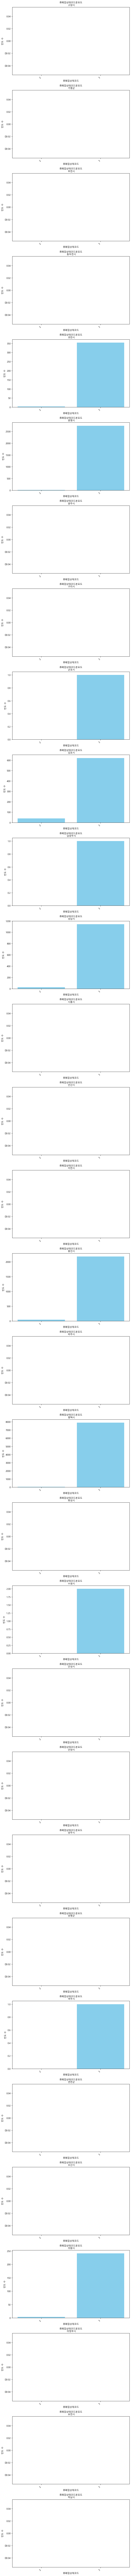

In [149]:
# 시각화
# 긴 이름을 처리하도록 그림 크기 조정
fig, axs = plt.subplots(nrows=len(unique_city_county_names_list), ncols=1, figsize=(8, 5 * len(unique_city_county_names_list)))
fig.tight_layout(pad=5.0)

# If there is only one city/county, axs will not be a list but a single Axes object
if len(unique_city_county_names_list) == 1:
    axs = [axs]

# Iterate through each city/county name and create a plot
for ax, city_county_name in zip(axs, unique_city_county_names_list):
    # Filter DataFrame for the current city/county
    filtered_df = df_filtered[df_filtered['시군명'] == city_county_name]
    
    # Group by '휴폐업상태코드' and count occurrences
    grouped_result = filtered_df.groupby('휴폐업상태코드').size().reindex([2, 3], fill_value=0)
    
    # Plot the results
    ax.bar(grouped_result.index.astype(str), grouped_result.values, color='skyblue')
    
    # Set labels and title for each subplot
    ax.set_xlabel('휴폐업상태코드')
    ax.set_ylabel('빈도 수')
    ax.set_title(f'휴폐업상태코드분포도\n {city_county_name}', fontsize=10)

    # Rotate x-axis labels if needed
    ax.set_xticks(grouped_result.index.astype(str))
    ax.set_xticklabels(grouped_result.index.astype(str), rotation=45, ha='right')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### 각 시군별로 휴폐업 상태를 확인 해 보았다.
- 고양시, 의정부시 등 상대적으로 인구 분포가 높은 곳은 그만큼 휴,폐업 상태인 곳도 어느정도 분포하는 듯 하다. 반대로 인구 분포가 낮아 데이터의 표본이 적은 곳이 휴폐업상태가 전부 정상영업인 부분도 있는 듯.
- 어떤 업종이 휴폐업상태인지도 알아볼 필요가 있음.

# 어떤 업종이 휴폐업상태인가?

In [150]:
df = pd.read_csv('지역화폐 가맹점_20240331.csv', encoding='cp949')

c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [151]:
# Select relevant columns and create a copy of the DataFrame
df_filtered = df[['시군명', '업종명(종목명)', '상호명', '업종코드', '휴폐업상태코드', '폐업일자']].copy()

In [152]:
# Fill NaN values in 'Closed Business Status Code' with 1
df_filtered['휴폐업상태코드'] = df_filtered['휴폐업상태코드'].fillna(1)

In [153]:
# Convert 'Closed Business Status Code' to integer type
df_filtered['휴폐업상태코드'] = df_filtered['휴폐업상태코드'].astype(int)

In [154]:
# Get unique city/county names
unique_city_county_names_list = df_filtered['시군명'].unique().tolist()

In [155]:
# Iterate through each city/county name and group by industry name
for city_county_name in unique_city_county_names_list:
    # Filter DataFrame for the current city/county
    filtered_df_city = df_filtered[df_filtered['시군명'] == city_county_name]
    
    # Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
    grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().unstack(fill_value=0)
    
    # Print the results
    print(f"\n시군명: {city_county_name}")
    print("Grouped by '업종명(종목명)' and '휴폐업상태코드':")
    print(grouped_result)


시군명: 고양시
Grouped by '업종명(종목명)' and '휴폐업상태코드':
휴폐업상태코드     1
업종명(종목명)     
가구판매점     129
가발         11
가방.핸드백     24
가전제품       23
건강보조식품     89
...       ...
헬스클럽      177
호텔(특급외)     5
화방.표구점      6
화원.화초     316
화장품       349

[170 rows x 1 columns]

시군명: 가평군
Grouped by '업종명(종목명)' and '휴폐업상태코드':
휴폐업상태코드    1
업종명(종목명)    
가구판매점     11
가방.핸드백     1
가전제품       8
건강보조식품    19
골프연습장     18
...       ..
한의원       15
헬스클럽       9
호텔(특급외)    5
화원.화초     24
화장품       23

[137 rows x 1 columns]

시군명: 부천시
Grouped by '업종명(종목명)' and '휴폐업상태코드':
휴폐업상태코드     1
업종명(종목명)     
가구판매점      82
가발         23
가방.핸드백     25
가전제품       38
각종단체회비      3
...       ...
헬스클럽      150
호텔(특급외)     8
화방.표구점      7
화원.화초     244
화장품       357

[172 rows x 1 columns]

시군명: 동두천시
Grouped by '업종명(종목명)' and '휴폐업상태코드':
휴폐업상태코드    1
업종명(종목명)    
가구판매점     13
가방.핸드백    10
가전제품       2
건강보조식품    22
골프연습장      5
...       ..
헬스클럽      16
호텔(특급외)    5
화방.표구점     2
화원.화초     21
화장품       55

[141 rows x 1 columns]

시군명: 과천시
Gro

- 이렇게 보면 보기 어려우니 아쉽지만 각 시마다 한번씩 다 돌려본 후 시각화를 해보자...

# 코드가 2또는 3인 시/군 시각화 (업종별)

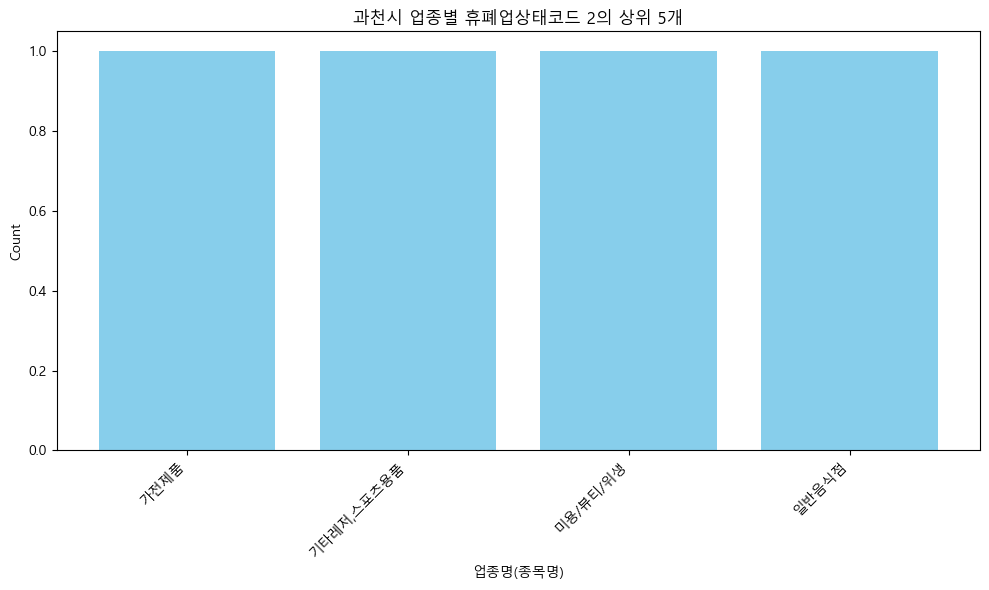

In [247]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[4]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([2])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[4]} 업종별 휴폐업상태코드 2의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

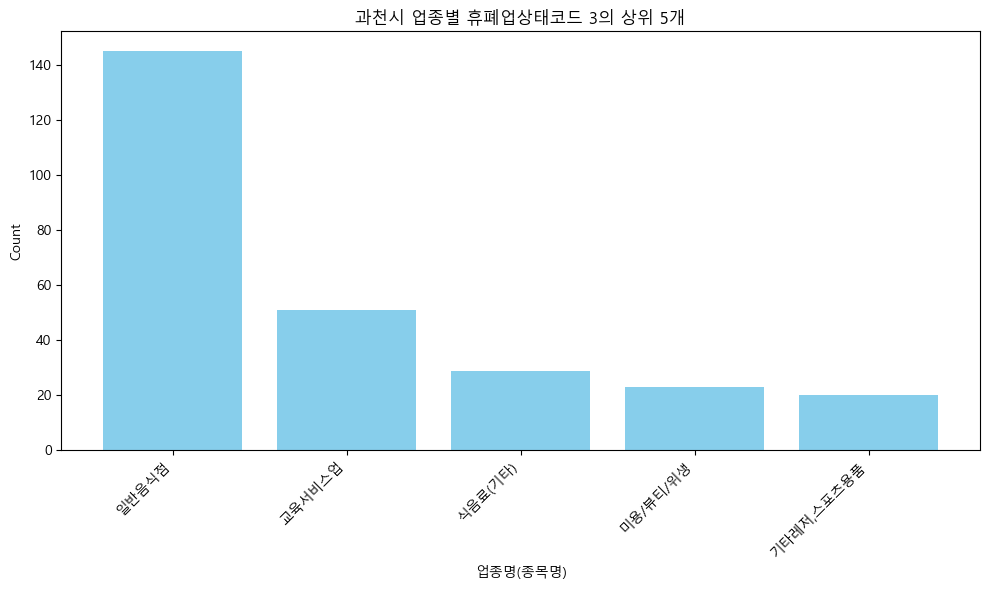

In [248]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[4]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[4]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

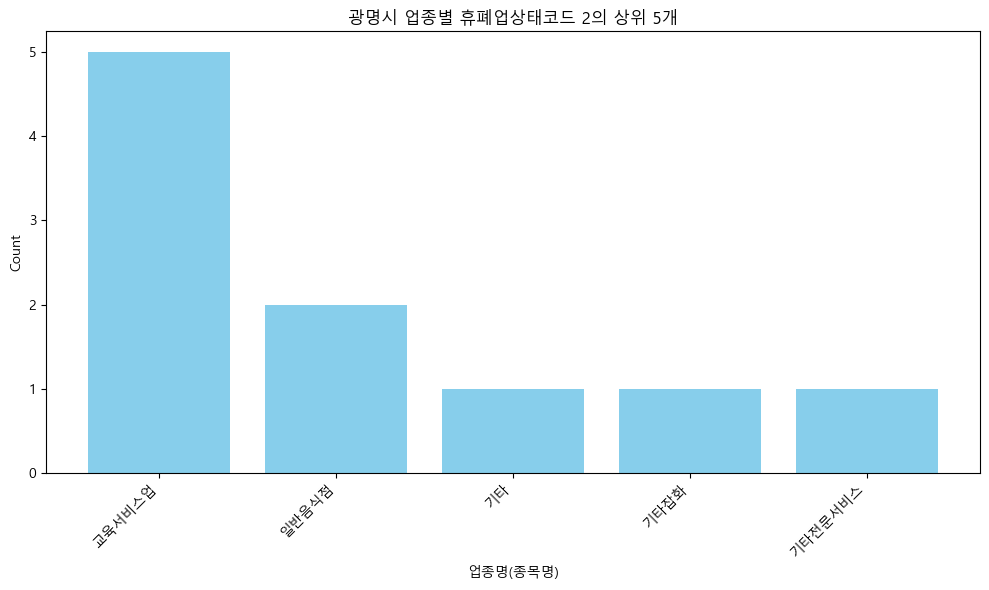

In [251]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[5]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([2])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[5]} 업종별 휴폐업상태코드 2의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

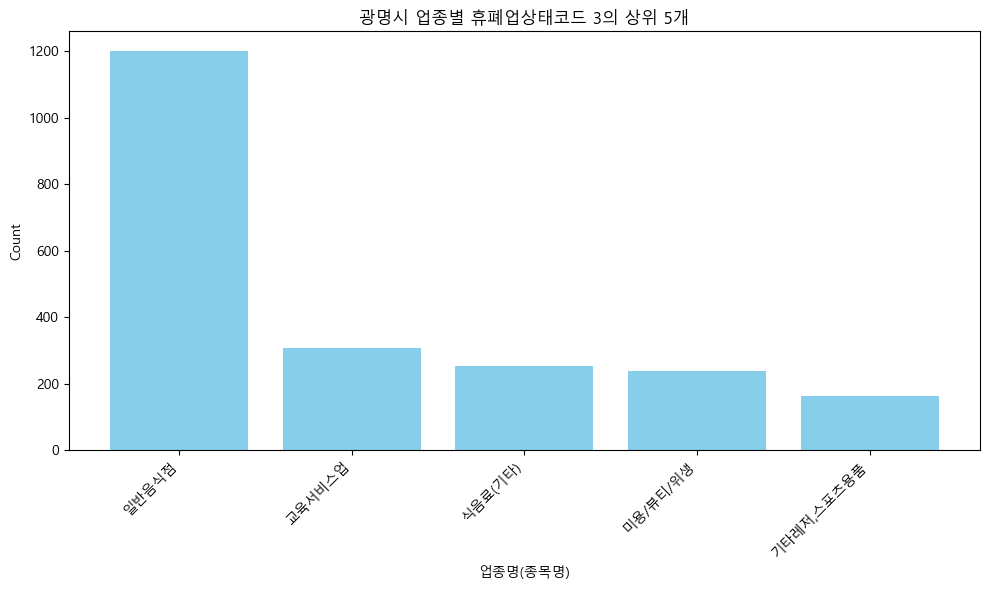

In [250]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[5]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[5]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

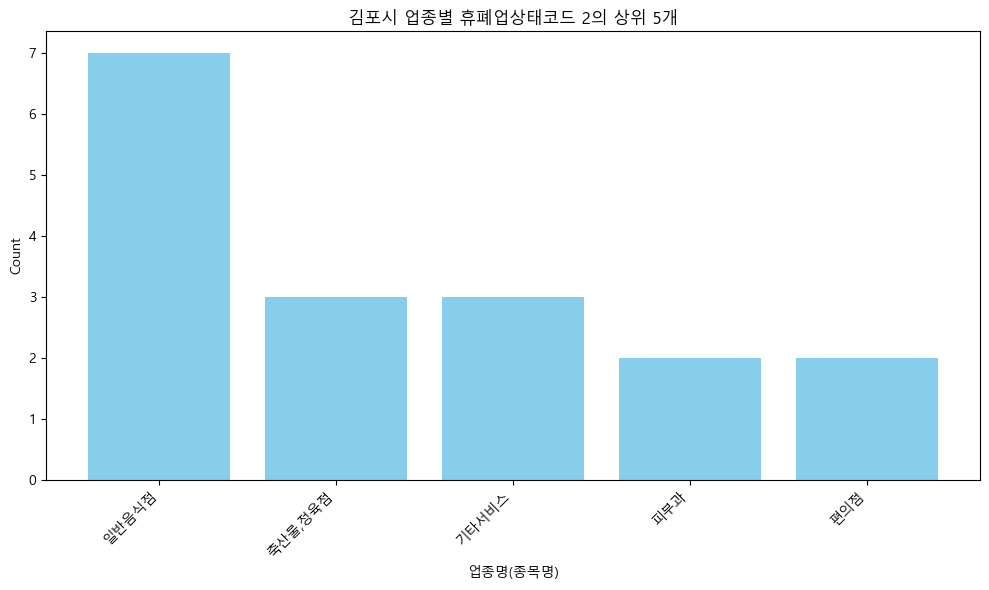

In [257]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[9]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([2])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[9]} 업종별 휴폐업상태코드 2의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

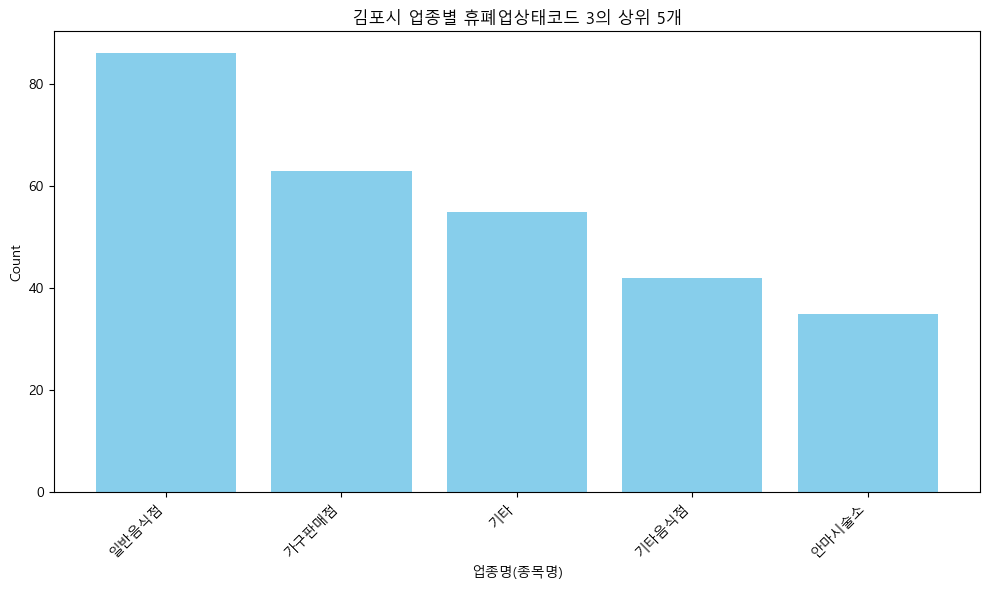

In [258]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[9]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[9]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

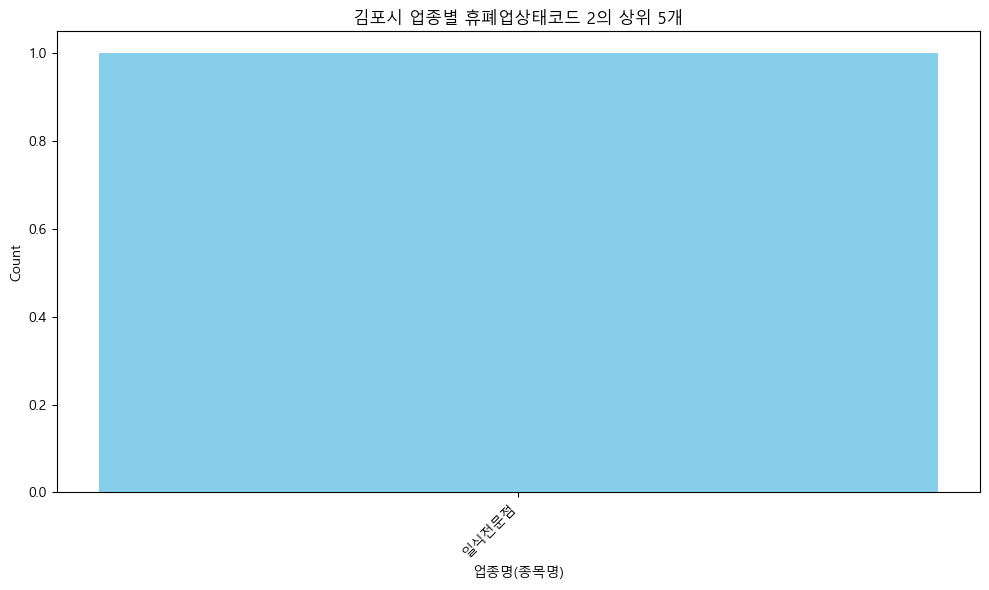

In [262]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[10]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[10]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [193]:
# 한글 글꼴 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우에서 '맑은 고딕' 글꼴을 사용합니다
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

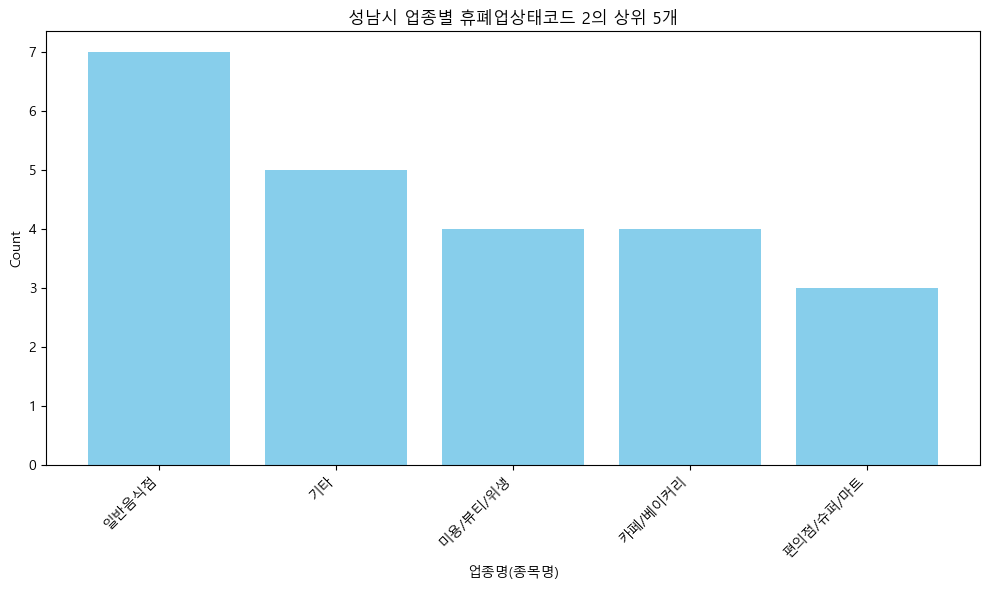

In [260]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[11]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([2])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[11]} 업종별 휴폐업상태코드 2의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

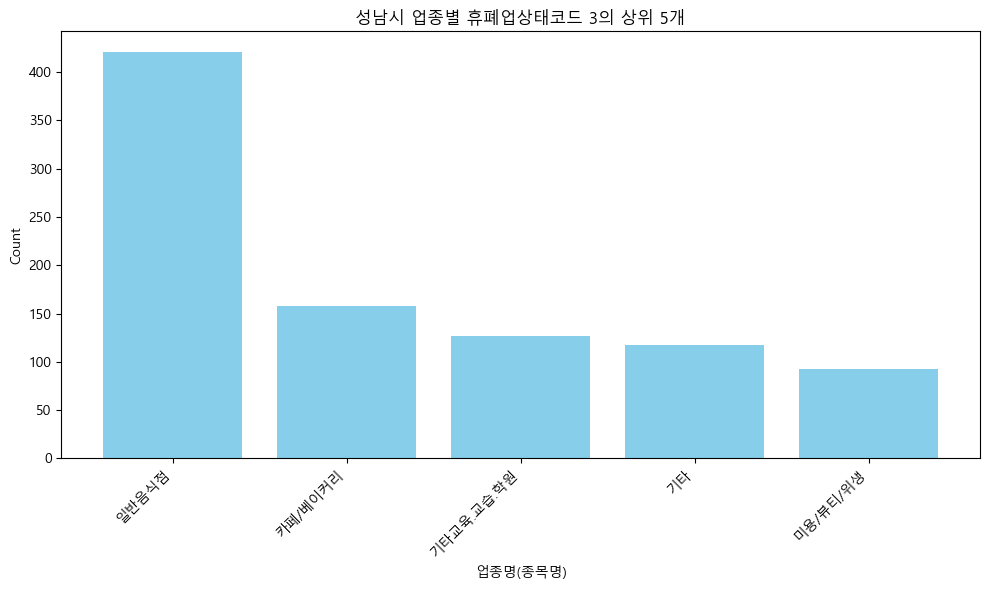

In [261]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[11]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[11]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

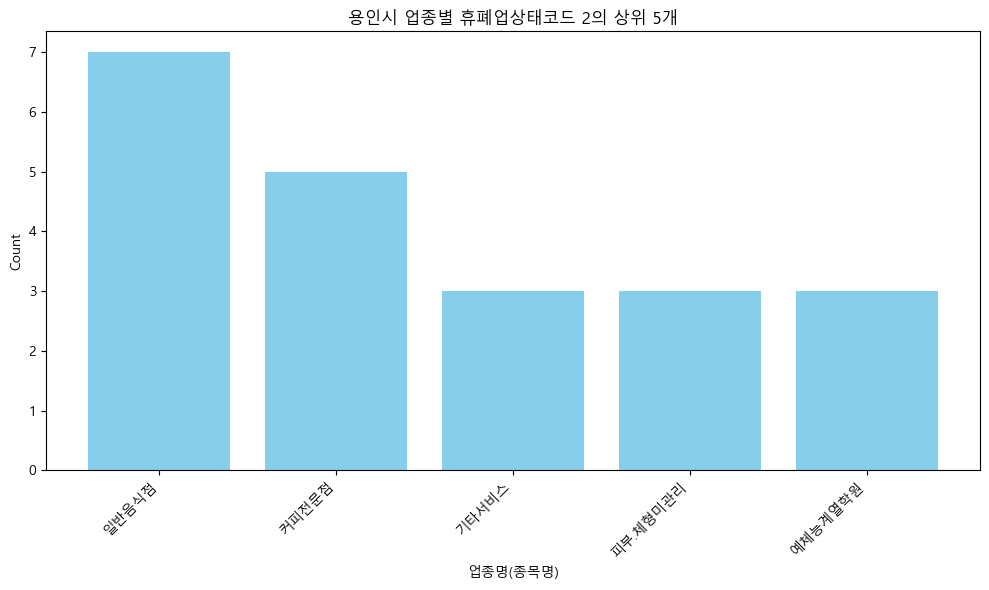

In [220]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[15]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([2])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[15]} 업종별 휴폐업상태코드 2의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

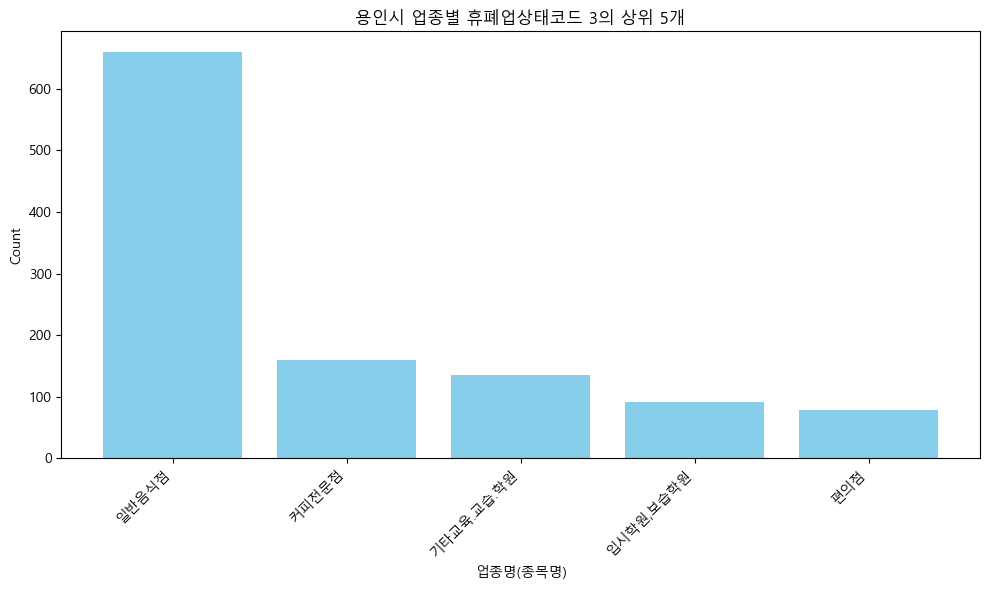

In [221]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[15]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[15]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

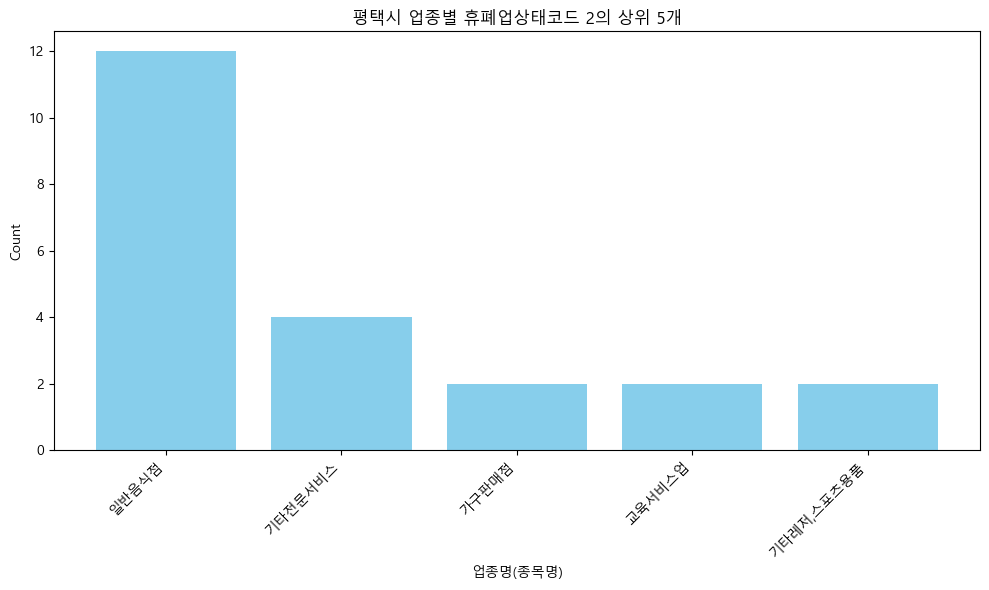

In [224]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[17]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([2])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[17]} 업종별 휴폐업상태코드 2의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

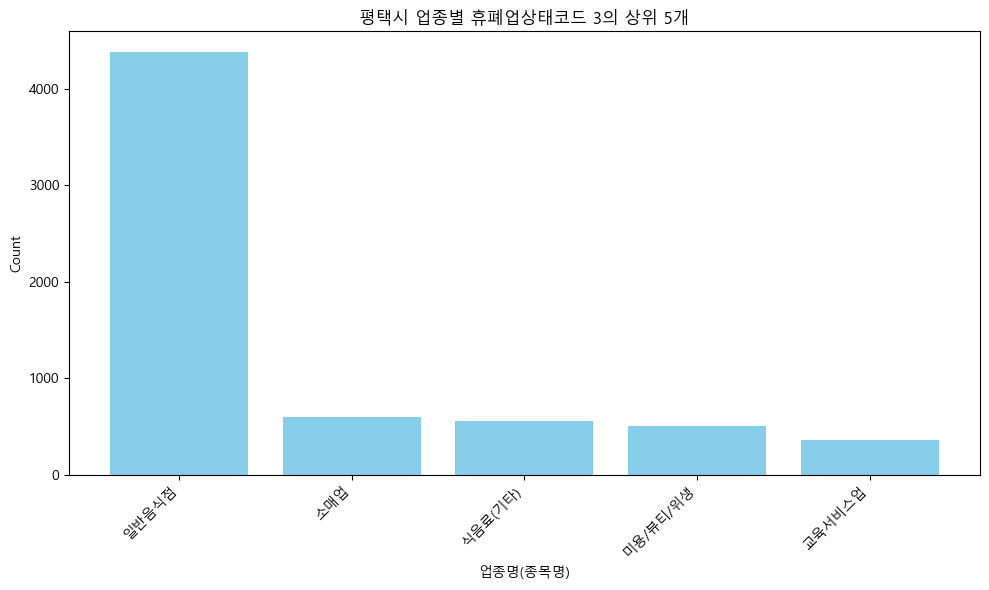

In [225]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[17]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[17]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

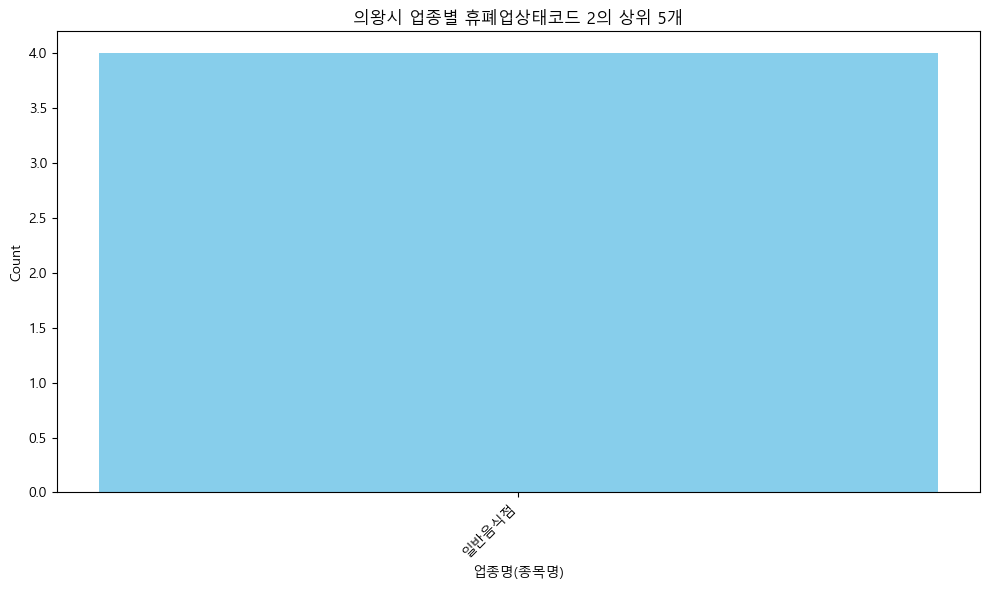

In [235]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[27]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([2])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[27]} 업종별 휴폐업상태코드 2의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

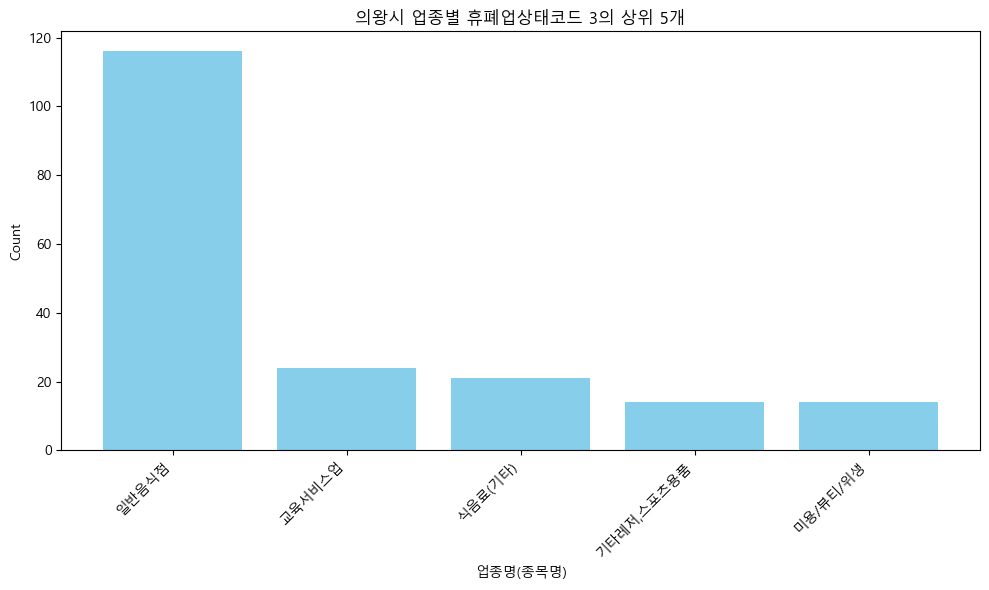

In [236]:
filtered_df_city = df_filtered[df_filtered['시군명'] == unique_city_county_names_list[27]]

# Filter DataFrame for Closed Business Status Code 2 and 3
filtered_df_city = filtered_df_city[filtered_df_city['휴폐업상태코드'].isin([3])]

# Group by 'Industry Name (Stock Name)' and 'Closed Business Status Code', and count occurrences
grouped_result = filtered_df_city.groupby(['업종명(종목명)', '휴폐업상태코드']).size().reset_index(name='count')

# Sort by 'count' in descending order
grouped_result = grouped_result.sort_values(by='count', ascending=False)

grouped_result

# Sort by 'count' in descending order and get the top 5 results
top_5_grouped_result = grouped_result.sort_values(by='count', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_grouped_result['업종명(종목명)'], top_5_grouped_result['count'], color='skyblue')
plt.xlabel('업종명(종목명)')
plt.ylabel('Count')
plt.title(f"{unique_city_county_names_list[27]} 업종별 휴폐업상태코드 3의 상위 5개")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()